In [2]:
!pip install scikit-learn

!pip install --upgrade pixiedust

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.6/197.6 kB 29.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pixiedust: filename=pixiedust-1.1.19-py3-none-any.whl size=321786 sha256=c7bcf10625a964c81956201d3fc95edef300c9db1c8132da469e14292555b40c
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/e7/c8/bb/ea11f2bc243510793a9156bdd7ca8c8af0cb9890a714dd9453
Successfully built pixiedust


In [3]:
!pip install --upgrade jinja2==3.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 19.1 MB/s eta 0:00:00
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 3.1.2
    Uninstalling Jinja2-3.1.2:
      Successfully uninstalled Jinja2-3.1.2


In [4]:
!pip install brunel

!pip install ibm_watson_machine_learning

import pixiedust

import sklearn

import pandas as pd

from sklearn.ensemble import RandomForestClassifier 

import numpy as np 

from sklearn.model_selection import train_test_split 

from scipy.io import arff 

import brunel

from ibm_watson_machine_learning import APIClient

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 31.5 MB/s eta 0:00:00ta 0:00:01
  Preparing metadata (setup.py) ... done
  Using cached jupyter_pip-0.3.1-py3-none-any.whl
  Created wheel for brunel: filename=brunel-2.6.2-py3-none-any.whl size=2161207 sha256=cd88ab7cfbe56c0728703130c515ac541a140178d58942196ac51fe052169c86
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/46/da/6e/cb99f128a3078bd9676225bb685f8c2c05a890e436df803c79
Successfully built brunel
Pixiedust database opened successfully
Table VERSION_TRACKER created successfully
Table METRICS_TRACKER created successfully

Share anonymous install statistics? (opt-out instructions)

PixieDust will record metadata on its environment the next time the package is installed or updated. The data is anonymized and aggregated to help plan for future releases, and records only the following values:

{
   "data_sent": currentDate,
   "runtime": "python",
   "application_version": currentPixiedustVersion,
   "space_id": nonIdenti

Pixiedust runtime updated. Please restart kernel
Table USER_PREFERENCES created successfully
Table service_connections created successfully


In [7]:
!pip install --user --upgrade pixiedust

In [8]:
import pixiedust

raw_df = pixiedust.sampleData('https://raw.githubusercontent.com/apischdo/skillsacademy/master/Denormalized%20claims%20data.csv')


Downloaded 463947 bytes
Creating pandas DataFrame for 'https://raw.githubusercontent.com/apischdo/skillsacademy/master/Denormalized%20claims%20data.csv'. Please wait...
Loading file using 'pandas'
Successfully created pandas DataFrame for 'https://raw.githubusercontent.com/apischdo/skillsacademy/master/Denormalized%20claims%20data.csv'



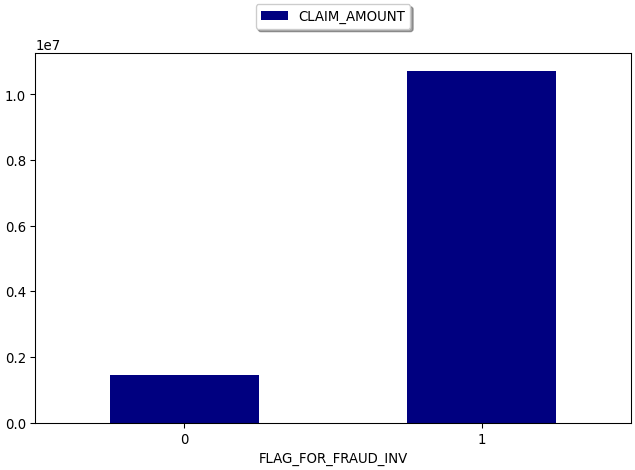

In [ ]:
display(raw_df)


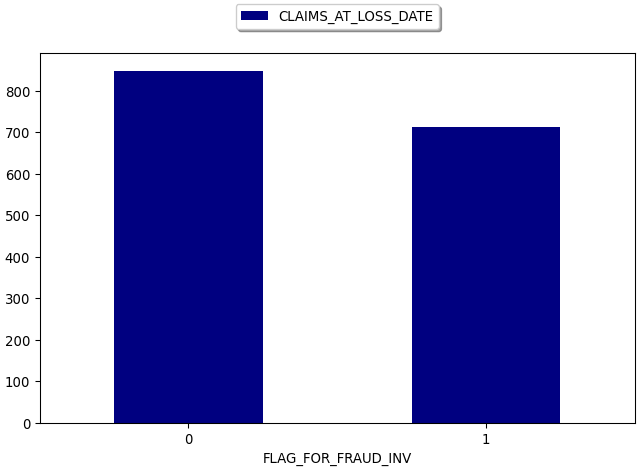

In [ ]:
display(raw_df)


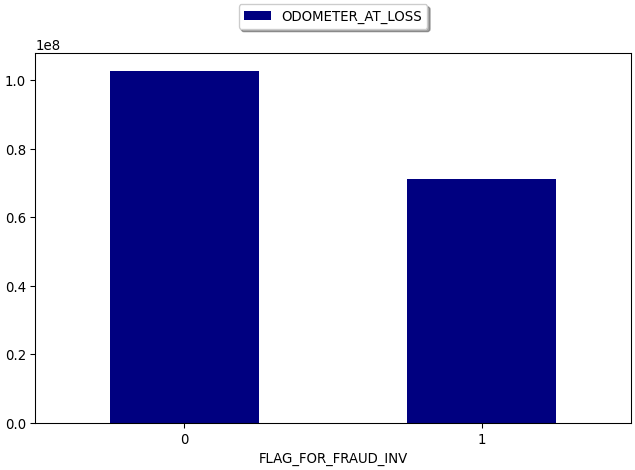

In [11]:
display(raw_df)


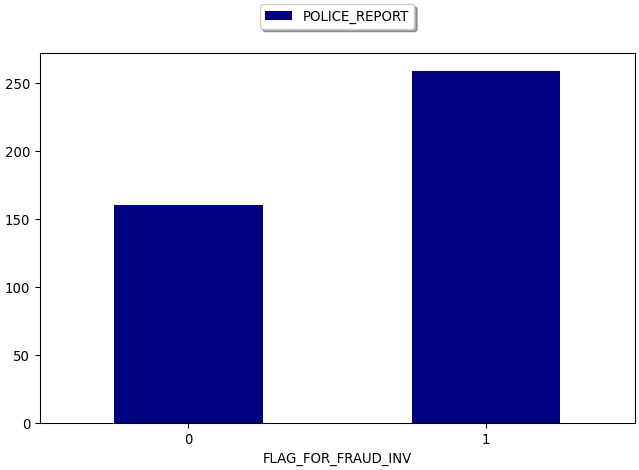

In [ ]:
display(raw_df)


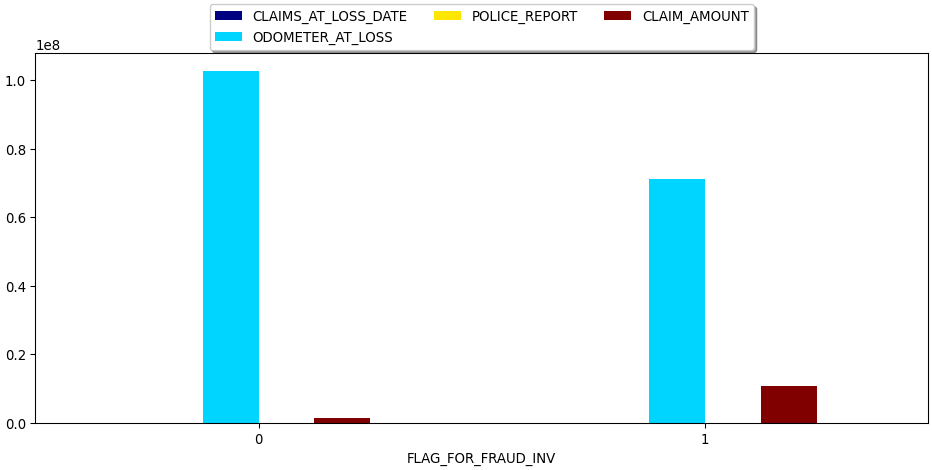

In [13]:
display(raw_df)

In [ ]:
display(raw_df)

In [24]:
# Claim within 15 days of policy expiry (date of loss - insurance_policy.expiry)

raw_df["EXPIRY_DATE"] = pd.to_datetime(raw_df["EXPIRY_DATE"])

raw_df["LOSS_EVENT_TIME"] = pd.to_datetime(raw_df["LOSS_EVENT_TIME"])

 

raw_df["DAYS_FROM_LOSS"] = raw_df["LOSS_EVENT_TIME"] - raw_df["EXPIRY_DATE"]

raw_df["DAYS_FROM_LOSS"] = abs(raw_df.DAYS_FROM_LOSS.dt.days)

 

raw_df.loc[raw_df['DAYS_FROM_LOSS'] >= 15, 'SUSPICIOUS_CLAIM_TIME'] = 1

raw_df.loc[raw_df['DAYS_FROM_LOSS'] < 15, 'SUSPICIOUS_CLAIM_TIME'] = 0

In [25]:
raw_df["SUSPICIOUS_CLAIM_TIME"].value_counts()

1.0    915
0.0     60
Name: SUSPICIOUS_CLAIM_TIME, dtype: int64

In [26]:
# Expired drivers license (if date of loss > insurance_driver.drivers_license_expiry)

raw_df["DRIVERS_LICENSE_EXPIRY"] = pd.to_datetime(raw_df["DRIVERS_LICENSE_EXPIRY"])

 

raw_df["DAYS_FROM_L_EXPIRY"] = raw_df["DRIVERS_LICENSE_EXPIRY"] - raw_df["LOSS_EVENT_TIME"]

raw_df["DAYS_FROM_L_EXPIRY"] = raw_df.DAYS_FROM_L_EXPIRY.dt.days

 

raw_df.loc[raw_df['DAYS_FROM_L_EXPIRY'] >= 0, 'EXPIRED_LICENSE'] = 0

raw_df.loc[raw_df['DAYS_FROM_L_EXPIRY'] < 0, 'EXPIRED_LICENSE'] = 1

In [27]:
# Days living at current address (date of loss - insurance_driver.date_at_current_address)

 

raw_df["DATE_AT_CURRENT_ADDRESS"] = pd.to_datetime(raw_df["DATE_AT_CURRENT_ADDRESS"])

raw_df["DAYS_AT_ADDRESS"] = raw_df["LOSS_EVENT_TIME"] - raw_df["DATE_AT_CURRENT_ADDRESS"]

raw_df["DAYS_AT_ADDRESS"] = abs(raw_df.DAYS_AT_ADDRESS.dt.days)

 

raw_df.loc[raw_df['DAYS_AT_ADDRESS'] >= 15, 'SUSPICIOUS_LIVING'] = 1

raw_df.loc[raw_df['DAYS_AT_ADDRESS'] < 15, 'SUSPICIOUS_LIVING'] = 0

In [28]:
raw_df["SUSPICIOUS_LIVING"].value_counts()

1.0    973
0.0      2
Name: SUSPICIOUS_LIVING, dtype: int64

In [29]:
#7500/year

raw_df["START_DATE"] = pd.to_datetime(raw_df["START_DATE"])

#find number of days between policy creation and accident

raw_df["LENGTH_OF_POLICY"]=(raw_df["LOSS_EVENT_TIME"] - raw_df["START_DATE"]).dt.days

 

#convert to years

raw_df["LENGTH_OF_POLICY"]=raw_df["LENGTH_OF_POLICY"]/365

 

#divide Odometer at loss by years

raw_df["MILES/YEAR"] = raw_df["ODOMETER_AT_LOSS"]/raw_df["LENGTH_OF_POLICY"]

raw_df["MILES/YEAR"].value_counts()

263963.479358    1
118223.849282    1
101693.055556    1
128489.623245    1
337031.306557    1
                ..
293520.237762    1
149085.527500    1
689559.489796    1
291911.041860    1
119873.677122    1
Name: MILES/YEAR, Length: 975, dtype: int64

In [30]:
# Conflict on whether a policyholder with a low mileage discount experienced a loss with high mileage at the point of loss

raw_df.loc[raw_df["MILES/YEAR"] <7500, 'LOW_MILEAGE_AT_LOSS'] = 1

raw_df.loc[raw_df["MILES/YEAR"] >=7500, 'LOW_MILEAGE_AT_LOSS'] = 0

In [31]:
raw_df.loc[raw_df["LOW_MILEAGE_USE"]==raw_df["LOW_MILEAGE_AT_LOSS"], 'SUSPICIOUS_MILEAGE'] = 0

raw_df.loc[raw_df["LOW_MILEAGE_USE"]!=raw_df["LOW_MILEAGE_AT_LOSS"], 'SUSPICIOUS_MILEAGE'] = 1

In [32]:
raw_df.loc[raw_df["CLAIM_AMOUNT"] <3000, 'EXCESSIVE_CLAIM_AMOUNT'] = 0

raw_df.loc[raw_df["CLAIM_AMOUNT"] >=3000, 'EXCESSIVE_CLAIM_AMOUNT'] = 1

In [33]:
# dataframes for certain features

features = ['FLAG_FOR_FRAUD_INV', 

 'SUSPICIOUS_MILEAGE',

 'EXPIRED_LICENSE',

 'SUSPICIOUS_CLAIM_TIME',

 'SUSPICIOUS_LIVING',

 'EXCESSIVE_CLAIM_AMOUNT']

In [34]:
df_model = raw_df[features]

In [35]:
#ensure all relevant features are integers

df_model["SUSPICIOUS_LIVING"] = df_model["SUSPICIOUS_LIVING"].astype(int)

df_model["EXPIRED_LICENSE"] = df_model["EXPIRED_LICENSE"].astype(int)

df_model["SUSPICIOUS_CLAIM_TIME"] = df_model["SUSPICIOUS_CLAIM_TIME"].astype(int)

df_model["SUSPICIOUS_MILEAGE"] = df_model["SUSPICIOUS_MILEAGE"].astype(int)

df_model["EXCESSIVE_CLAIM_AMOUNT"] = df_model["EXCESSIVE_CLAIM_AMOUNT"].astype(int)

/tmp/wsuser/ipykernel_158/1585913532.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["SUSPICIOUS_LIVING"] = df_model["SUSPICIOUS_LIVING"].astype(int)
/tmp/wsuser/ipykernel_158/1585913532.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model["EXPIRED_LICENSE"] = df_model["EXPIRED_LICENSE"].astype(int)
/tmp/wsuser/ipykernel_158/1585913532.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [36]:
raw_df.groupby("FLAG_FOR_FRAUD_INV", as_index=False).mean()

,FLAG_FOR_FRAUD_INV,INCIDENT_CAUSE,DESCRIPTION,CLAIM_STATUS,ODOMETER_AT_LOSS,POLICE_REPORT,CLAIMS_AT_LOSS_DATE,LOSS_LOCATION_LAT,LOSS_LOCATION_LONG,CLAIM_AMOUNT,...,SUSPICIOUS_CLAIM_TIME,DAYS_FROM_L_EXPIRY,EXPIRED_LICENSE,DAYS_AT_ADDRESS,SUSPICIOUS_LIVING,LENGTH_OF_POLICY,MILES/YEAR,LOW_MILEAGE_AT_LOSS,SUSPICIOUS_MILEAGE,EXCESSIVE_CLAIM_AMOUNT
0,0,2.926186,NaN,2.977153,180783.846046,0.281195,1.492091,41.857895,-87.675014,2521.147627,...,0.933216,894.546573,0.042179,3487.956063,0.996485,1.070159,205170.356701,0.0,0.094903,0.086116
1,1,3.041872,NaN,1.103448,175504.046305,0.637931,1.758621,41.860133,-87.679617,26429.480296,...,0.945813,917.960591,0.036946,3252.413793,1.000000,0.960490,230687.578997,0.0,0.088670,0.933498


In [37]:
#split data into x and y variables

xVar = df_model[["EXPIRED_LICENSE","SUSPICIOUS_CLAIM_TIME","SUSPICIOUS_LIVING","SUSPICIOUS_MILEAGE","EXCESSIVE_CLAIM_AMOUNT"]]

yVar = df_model["FLAG_FOR_FRAUD_INV"]

In [38]:
xVar.head()

,EXPIRED_LICENSE,SUSPICIOUS_CLAIM_TIME,SUSPICIOUS_LIVING,SUSPICIOUS_MILEAGE,EXCESSIVE_CLAIM_AMOUNT
0,0,1,1,0,1
1,1,1,1,0,0
2,0,1,1,1,1
3,0,1,1,0,1
4,0,1,1,0,0


In [39]:
#split into a test/train set

X_train, X_test, y_train, y_test = train_test_split(xVar, yVar, test_size=0.2)

print (X_train.shape, y_train.shape)

print (X_test.shape, y_test.shape)

(780, 5) (780,)
(195, 5) (195,)


In [40]:
#train model

clf = RandomForestClassifier(n_jobs=2, random_state=0)

 

clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=2, random_state=0)

In [41]:
#create confusion matrix to gut check model

preds = clf.predict(X_test)

pd.crosstab(y_test, preds, rownames=['Actual Result'], colnames=['Predicted Result'])

Predicted Result,0,1
Actual Result,,
0,114,5
1,6,70


In [ ]:
display(raw_df)